In [12]:
import h5py
import numpy as np 
from feasibgs import util as UT
from redrock.external import desi
from redrock.templates import Template

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
f_galtemp = ''.join(['/Users/chang/projects/packages/redrock-templates/rrtemplate-galaxy.fits'])
temp = Template(filename=f_galtemp)

DEBUG: Using default redshift range -0.0050-1.6997 for rrtemplate-galaxy.fits


In [4]:
emline_keys = ['oiib', 'oiir', 'hb',  'oiiib', 'oiiir', 'oib', 'oir', 'niib', 'ha', 'niir', 'siib', 'siir']
emline_lambda = [3726., 3729., 4861., 4959., 5007., 6300., 6364., 6548., 6563., 6583., 6717., 6731.]

(-0.05, 0.05)

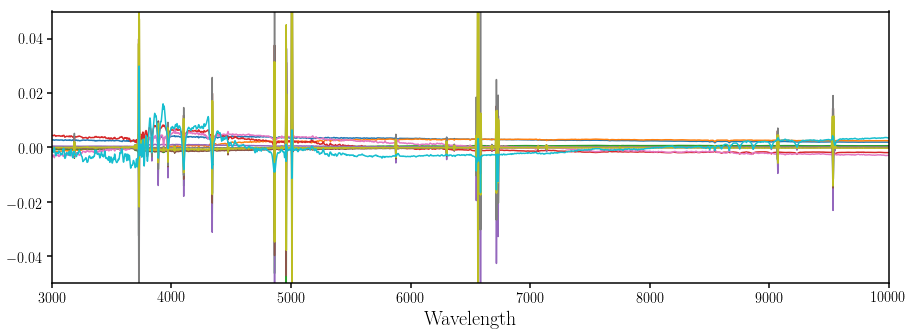

In [5]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
for i in range(temp.flux.shape[0]):
    sub.plot(temp.wave, temp.flux[i])
sub.set_xlabel('Wavelength', fontsize=20)
sub.set_xlim([3e3, 1e4])
sub.set_ylim([-0.05, 0.05])

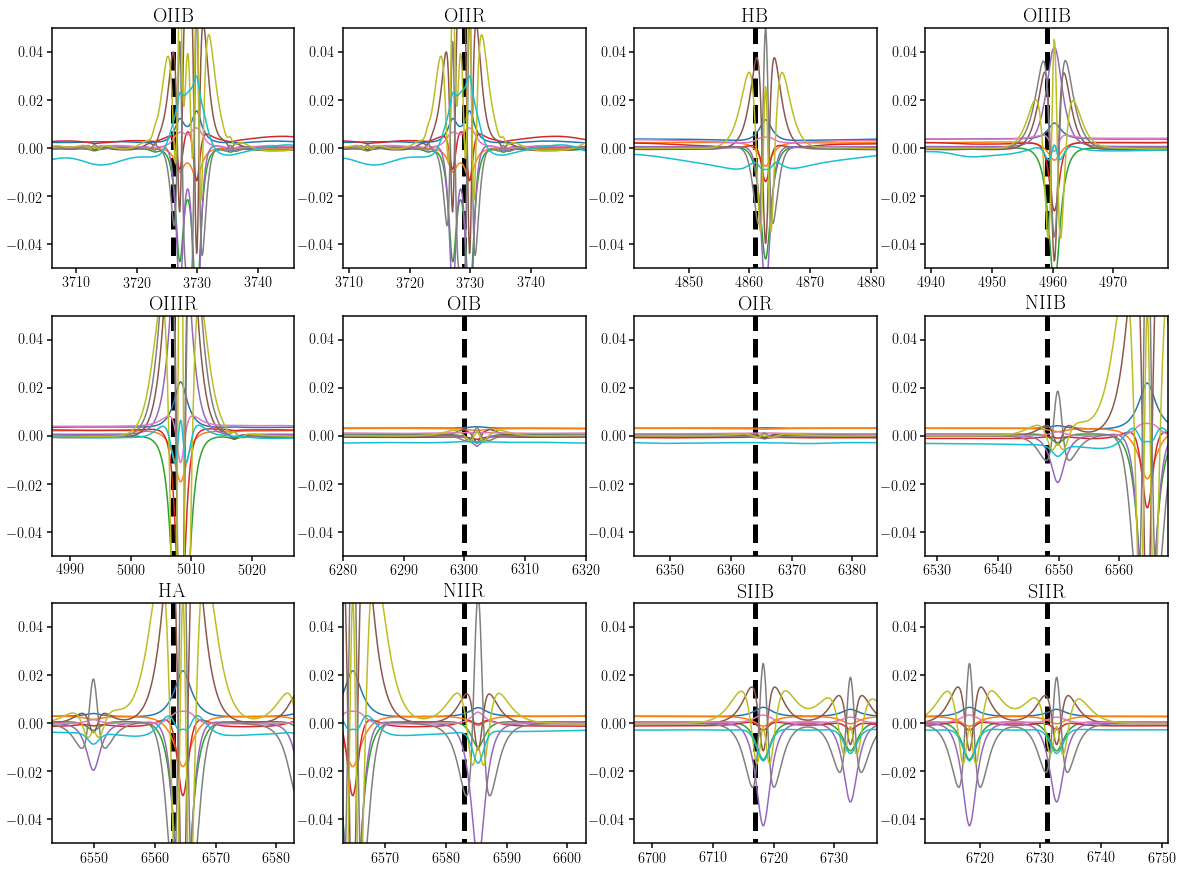

In [43]:
fig = plt.figure(figsize=(20,15))
for i_l, lam in enumerate(emline_lambda): 
    sub = fig.add_subplot(3,4,i_l+1)
    for i in range(temp.flux.shape[0]):
        sub.plot(temp.wave, temp.flux[i])
    sub.vlines(lam, -0.1, 0.1, linewidth=5, linestyle='--')
    sub.set_title(emline_keys[i_l].upper(), fontsize=20)
    sub.set_xlim([lam-20, lam+20])
    sub.set_ylim([-0.05, 0.05])

In [11]:
f_spec = ''.join([UT.dat_dir(), 'spectra/gamadr3_legacydr7/',
                       'g15.synSpectra.darksky.seed1.exptime300.1of13blocks.fits'])
target = desi.DistTargetsDESI(f_spec)._my_data

In [14]:
fblock = h5py.File(''.join([UT.dat_dir(), 'spectra/gamadr3_legacydr7/',
                            'gleg.g15.darksky.seed1.exptime300.1of13blocks.hdf5']), 'r')

In [24]:
gama_ha = fblock['gama-spec']['ha_flux'].value
zred = fblock['gama-spec']['z'].value
print np.where(gama_ha > 1e3)[0][:10]
print zred[:10]

[ 0  9 29 32 35 48 77 84 85 93]
[0.125284   0.31862774 0.23001106 0.2728309  0.23246159 0.05463286
 0.22040227 0.29020756 0.16156642 0.13569   ]


(3000.0, 9000.0)

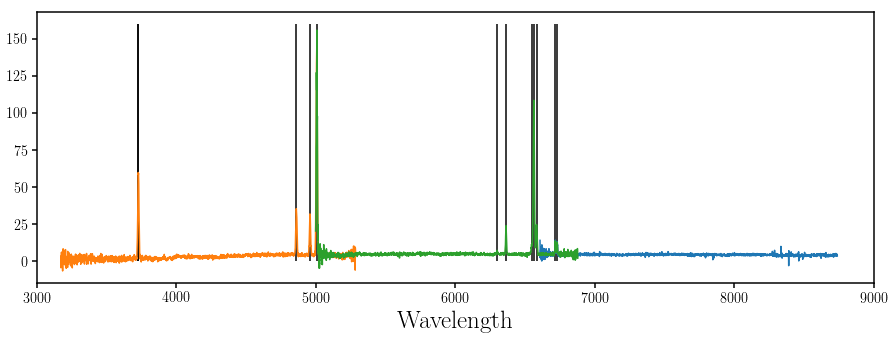

In [31]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
for s in target[0].spectra: 
    sub.plot(s.wave/(1.+zred[0]), s.flux)
for i_l, lam in enumerate(emline_lambda): 
    sub.vlines(lam, 0., 160.)
sub.set_xlabel('Wavelength', fontsize=25)
sub.set_xlim([3e3, 9e3])

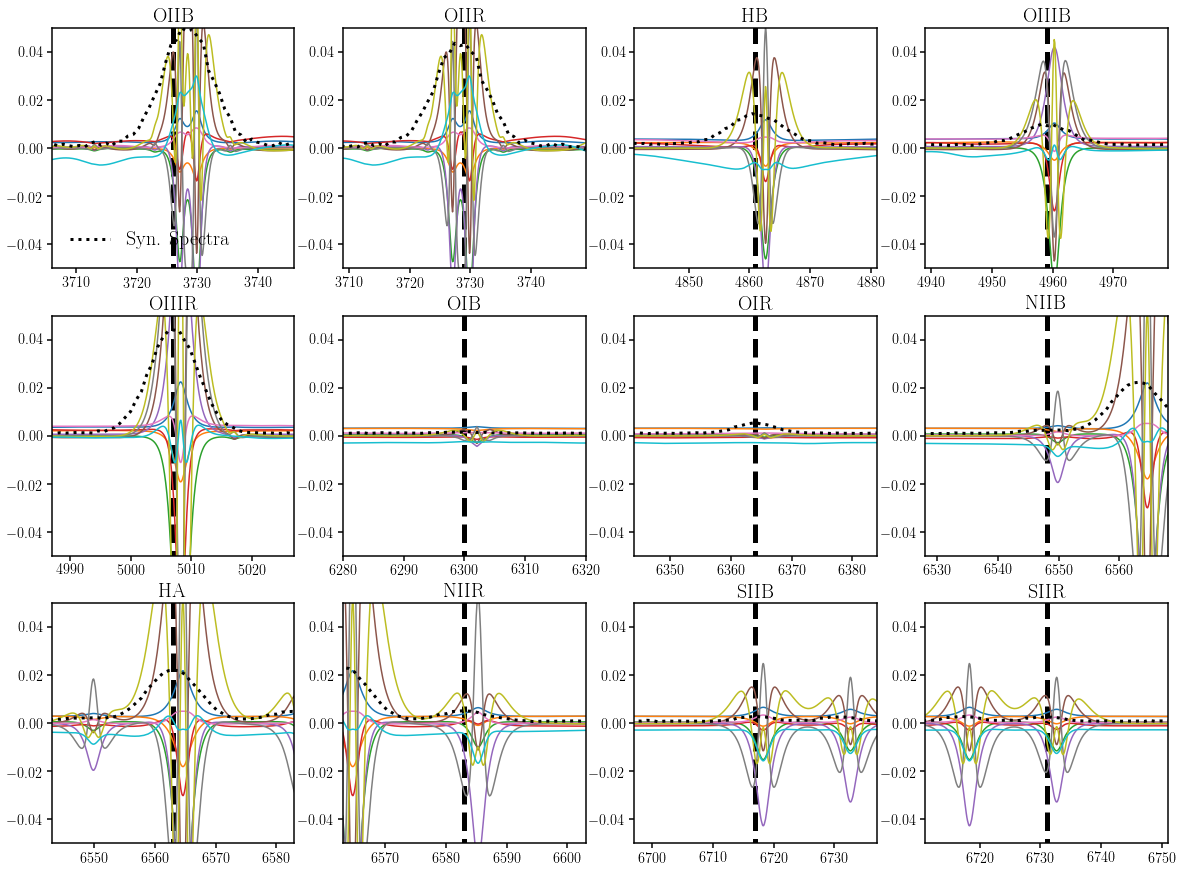

In [41]:
fig = plt.figure(figsize=(20,15))
for i_l, lam in enumerate(emline_lambda): 
    sub = fig.add_subplot(3,4,i_l+1)
    for i in range(temp.flux.shape[0]):
        sub.plot(temp.wave, temp.flux[i])
    for s in target[0].spectra: 
        inbin = (s.wave > lam-20.) & (s.wave < lam+20)
        if np.sum(inbin) > 0: 
            sub.plot(s.wave/(1.+zred[0]), s.flux/np.average(s.flux[inbin])/1e3, c='k', ls=':', lw=3, 
                     label='Syn. Spectra')
            
    if i_l == 0: sub.legend(fontsize=20)
    sub.vlines(lam, -0.1, 0.1, linewidth=5, linestyle='--')
    sub.set_title(emline_keys[i_l].upper(), fontsize=20)
    sub.set_xlim([lam-20, lam+20])
    sub.set_ylim([-0.05, 0.05])